In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = "processed_images/IMG_1.jpg"
points_path = "processed_points/IMG_1.npy"
density_path = "density_maps/IMG_1.npy"

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

points = np.load(points_path)
density = np.load(density_path)

In [3]:
img_points = img_rgb.copy()

for x, y in points:
    cv2.circle(img_points, (int(x), int(y)), 3, (255, 0, 0), -1)

In [4]:
heatmap = cv2.applyColorMap((density / density.max() * 255).astype(np.uint8), cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

overlay = cv2.addWeighted(img_rgb, 0.6, heatmap, 0.4, 0)

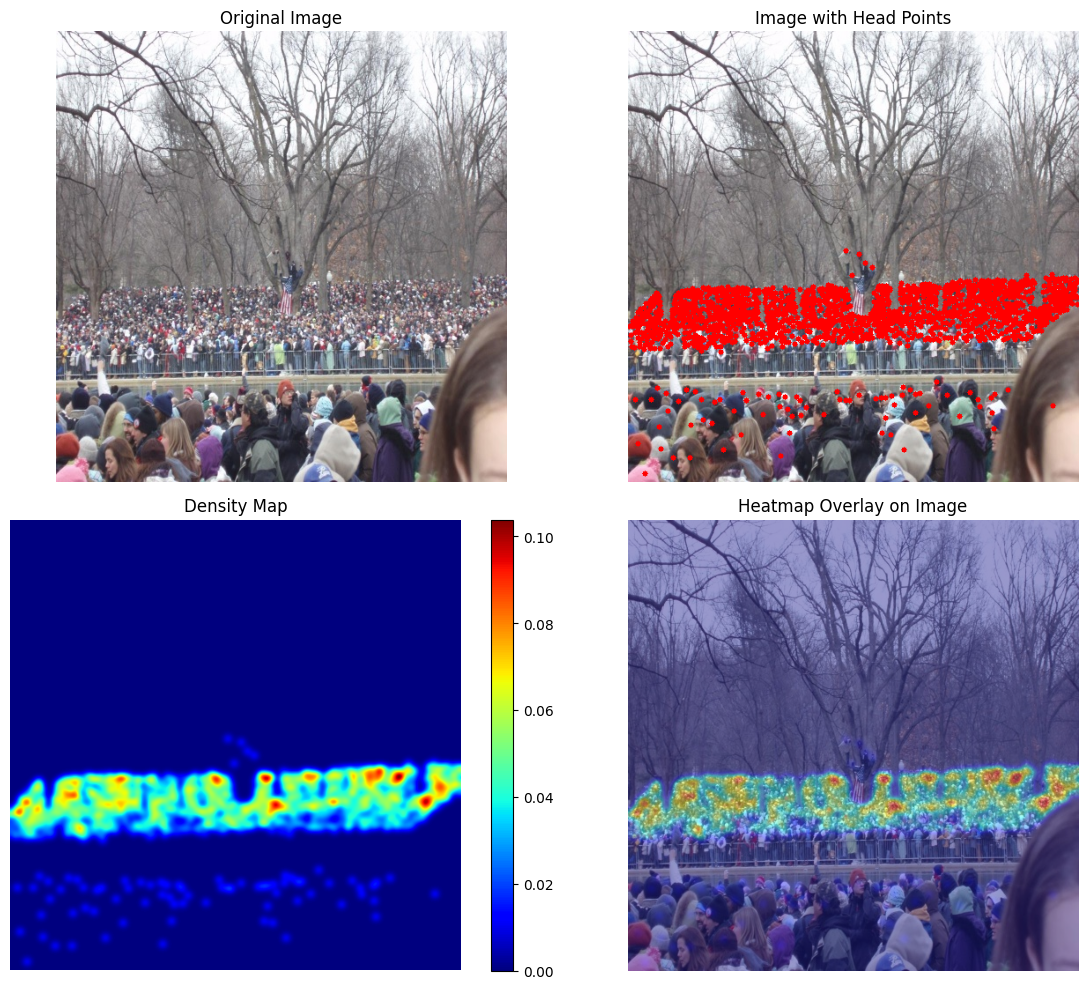

In [5]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_points)
plt.title("Image with Head Points")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(density, cmap="jet")
plt.title("Density Map")
plt.colorbar()
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(overlay)
plt.title("Heatmap Overlay on Image")
plt.axis("off")

plt.tight_layout()
plt.show()
